<h1>Module 2.5: Drug Dosage</h1>
<p>While the common subject for this module is drug dosage, we will use this module to introduce inputs into the system which are time varying and multicompartment models.  The general differential equation for these situations is still $\frac{dQ}{dt}=-KQ$ in which $Q$ is the amount of drug.  This will change slightly if we are considering the flow or rate to be dependent on a concentration difference.  Note that in general, the concentration is $c=\frac{Q}{V}$ or $c=\frac{Q}{M}$ for volumetric concentration or mass concentration.</p>

<h2>Initialization</h2>
<p>This section contains initialization code which gives this notebook the resources it needs to run<p>

In [1]:
#This code performs the necessary steps to prepare to plot.
from pylab import *     #Import plotting module matplotlib as well as other modules
                        #into the global namespace.
                        #Set the default plot to be inline rather than a new window.
        
#The following sets the figures to be in the notebook.
%matplotlib inline    
import inspect        #This allows us to print the source code in this notebook.

from Chapter2 import *      #Import the custom functions from this project.
goldenratio=1/2*(1+sqrt(5)) #The next few lines are used for the size of plots
fsx=7                       #Width (in inches) for the figures.
fsy=fsx/goldenratio         #Height (in inches) for the figures.

<h2>Multiple Drug Doses</h2>
<p>We now find the blood stream concenctration for a drug with multiple doses taken at a specified interval.  In this model we will consider the drug to be completely absorbed into the body in a single instance, and we will consider the body as a single compartment.</p>
<p>The code for this model is below</p>

In [2]:
print(inspect.getsource(multiple_dose_drug))

def multiple_dose_drug(dt, timemax, dose, interval, halflife, alpha):
    """Calculates blood concentration for multiple dose Dilantin as described in the text"""

    EliminationConstant = - math.log(0.5)/halflife
    drug_in_system = 0
    t = 0
    t_array = [t]
    drug_in_system_array = [drug_in_system]

    while t < timemax:
        if t % interval < dt:
            drug_in_system += alpha * dose
        drug_in_system -= EliminationConstant * drug_in_system * dt
        t += dt
        t_array.append(t)
        drug_in_system_array.append(drug_in_system/3000)

    return t_array, drug_in_system_array



In [3]:
dtime, dis = multiple_dose_drug(.1,200, 100*1000, 8, 22, 0.12)

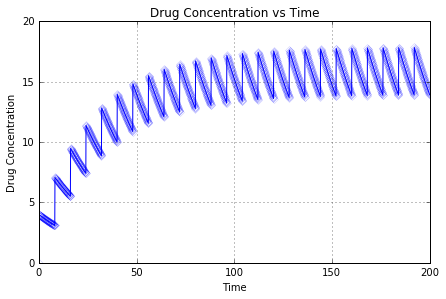

In [4]:
figure(figsize=(fsx, fsy))
plot(dtime, dis, 'D-', MFC=(1,0,0,0),mec=(0, 0, 1, 0.2))
axis([0, 200, 0, 20])
grid(True)
xlabel('Time')
ylabel('Drug Concentration')
title('Drug Concentration vs Time')
show()

<p>The figure above is identical to figure 2.5.4 from the text.  We now know we have a good base simulation running.  We will now work to extend it.</p>